# Sequence 10 : pandas

Un des meilleurs outils de manipulation de tableau hétérogène.

Il permet de manipule de grand tableau avec des label pour les ligens et les colonnes.

Très adapté aux stats.

L'idée vient de language R.

DataFrame = Tableau de data 2D

Series = colonne de data 1D










In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Series = 1D

In [73]:
s = pd.Series([7, 'yep', 'yop', 20.60])
s

0       7
1     yep
2     yop
3    20.6
dtype: object

In [74]:
s = pd.Series(['sam', 'garcia', 75000.],
              index=['prenom', 'nom', 'salaire_annuel'])
s

prenom               sam
nom               garcia
salaire_annuel     75000
dtype: object

In [75]:
s['nom']

'garcia'

In [76]:
s['nom'] = 'Garcia'
s

prenom               sam
nom               Garcia
salaire_annuel     75000
dtype: object

In [77]:
s.values

array(['sam', 'Garcia', 75000.0], dtype=object)

In [78]:
s.index

Index(['prenom', 'nom', 'salaire_annuel'], dtype='object')

In [79]:
# Filtrage

In [80]:
d = {'OFC':10., 'PRL' : 50., 'APC' : 12.46, 'CA1': np.nan, 'DG':  20.6}
nb_cell = pd.Series(d)
print(nb_cell)



APC    12.46
CA1      NaN
DG     20.60
OFC    10.00
PRL    50.00
dtype: float64


In [81]:
nb_cell[nb_cell>15.]

DG     20.6
PRL    50.0
dtype: float64

In [82]:
over_thresh = nb_cell>15.
over_thresh

APC    False
CA1    False
DG      True
OFC    False
PRL     True
dtype: bool

In [83]:
'DG' in nb_cell

True

 ## c'est comme numpy : opérateur possible

In [84]:
square = nb_cell**2
square



APC     155.2516
CA1          NaN
DG      424.3600
OFC     100.0000
PRL    2500.0000
dtype: float64

In [85]:
zscore = (nb_cell-nb_cell.mean())/nb_cell.std()
zscore

APC   -0.587549
CA1         NaN
DG    -0.144916
OFC   -0.721318
PRL    1.453783
dtype: float64

## missing values

In [86]:
nb_cell.isnull()

APC    False
CA1     True
DG     False
OFC    False
PRL    False
dtype: bool

In [87]:
nb_cell.notnull()

APC     True
CA1    False
DG      True
OFC     True
PRL     True
dtype: bool

In [88]:
nb_cell[nb_cell.notnull()]

APC    12.46
DG     20.60
OFC    10.00
PRL    50.00
dtype: float64

# DataFrame = 2D

C'est un tableau avec chaque colonne = une Series



In [109]:
data = {
    'name':['alex', 'sam', 'david', 'gramfort'],
    'sex' : [ 'F', 'M', 'M', 'M'],
    'alcohol_consumption' : [True, True, True, False],
    'drug_consumption' : [True, np.nan,  False, True],
    'coding_level' : [ 73.5,100., 19.3, 99.],
}

formateur = pd.DataFrame(data, columns=['name', 'sex', 'alcohol_consumption', 'drug_consumption', 'coding_level'])
formateur




,name,sex,alcohol_consumption,drug_consumption,coding_level
0,alex,F,True,True,73.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3
3,gramfort,M,False,True,99.0


index plus explicit

In [91]:
formateur.index = ['ac', 'sg',  'dm', 'ag']
formateur

,name,sex,alcohol_consumption,drug_consumption,coding_level
ac,alex,F,True,True,23.5
sg,sam,M,True,NaN,100.0
dm,david,M,True,False,19.3
ag,gramfort,M,False,True,99.0


# inspection

In [65]:
formateur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, sg to ag
Data columns (total 5 columns):
name                   4 non-null object
sex                    4 non-null object
alcohol_consumption    4 non-null bool
drug_consumption       3 non-null object
coding_level           4 non-null float64
dtypes: bool(1), float64(1), object(3)
memory usage: 164.0+ bytes


In [66]:
formateur.dtypes

name                    object
sex                     object
alcohol_consumption       bool
drug_consumption        object
coding_level           float64
dtype: object

In [67]:
formateur.columns

Index(['name', 'sex', 'alcohol_consumption', 'drug_consumption',
       'coding_level'],
      dtype='object')

In [68]:
formateur.index

Index(['sg', 'ac', 'dm', 'ag'], dtype='object')

In [69]:
formateur.describe()

,alcohol_consumption,coding_level
count,4,4.000000
mean,0.75,60.450000
std,0.5,45.125492
min,False,19.300000
25%,0.75,22.450000
50%,1,61.250000
75%,1,99.250000
max,True,100.000000


## selectionner une colone

par dict ou attribut

In [70]:
print(formateur['name'])
print(formateur.name)

sg        alex
ac         sam
dm       david
ag    gramfort
Name: name, dtype: object
sg        alex
ac         sam
dm       david
ag    gramfort
Name: name, dtype: object


## selectionner plusieurs colonnes

In [71]:

formateur[['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
sg,True,True
ac,True,NaN
dm,True,False
ag,False,True


## la vrai syntax pour selectionner : DataFrame.loc[]

In [29]:
# colonne
formateur.loc[:, ['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
sg,True,True
ac,True,NaN
dm,True,False
ag,False,True


In [30]:
# ligne
formateur.loc[['sg', 'dm'], :]

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,alex,F,True,True,100.0
dm,david,M,True,False,18.3


In [31]:
formateur.loc[['sg', 'dm'], ['alcohol_consumption', 'drug_consumption']]

,alcohol_consumption,drug_consumption
sg,True,True
dm,True,False


## syntax pour selectionner par compteur : DataFrame.iloc[]

C'est comme numpy en 2D!!!

In [37]:
# colonne
formateur.loc[:, ['alcohol_consumption', 'drug_consumption']]
formateur.iloc[:, 2:4]


,alcohol_consumption,drug_consumption
sg,True,True
ac,True,NaN
dm,True,False
ag,False,True


In [38]:
# ligne
formateur.loc[::2, :]

,name,sex,alcohol_consumption,drug_consumption,coding_level
sg,alex,F,True,True,100.0
dm,david,M,True,False,18.3


In [39]:
formateur.iloc[::2, 2:4]

,alcohol_consumption,drug_consumption
sg,True,True
dm,True,False


## selectioner par condition





In [95]:
f = formateur[formateur['coding_level']>80.]
f = formateur[formateur.coding_level>80.]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
1,sam,M,True,NaN,100
3,gramfort,M,False,True,99


In [96]:
f = formateur[formateur.alcohol_consumption]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
0,alex,F,True,True,73.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3


In [97]:
f = formateur[formateur.drug_consumption.isnull()]
f

,name,sex,alcohol_consumption,drug_consumption,coding_level
1,sam,M,True,NaN,100


# lecure depuis fichier : XLS, CVS, (database, clipboard, ...)

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html#pandas.read_excel


In [98]:
data = pd.read_csv('dataset titanic.csv', sep=',', header=0, encoding='utf8')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [99]:
data = pd.read_excel('dataset titanic.xlsx')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [100]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [101]:
data2 = data.set_index('PassengerId')
data.set_index('PassengerId', inplace=True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


# export vers excel

In [102]:
data = {
    'name':['alex', 'sam', 'david', 'gramfort'],
    'sex' : [ 'F', 'M', 'M', 'M'],
    'alcohol_consumption' : [True, True, True, False],
    'drug_consumption' : [True, np.nan,  False, True],
    'coding_level' : [ 73.5,100., 19.3, 99.],
}

formateur = pd.DataFrame(data, columns=['name', 'sex', 'alcohol_consumption', 'drug_consumption', 'coding_level'])
formateur

,name,sex,alcohol_consumption,drug_consumption,coding_level
0,alex,F,True,True,73.5
1,sam,M,True,NaN,100.0
2,david,M,True,False,19.3
3,gramfort,M,False,True,99.0


In [103]:
formateur2 = formateur[['sex', 'alcohol_consumption', 'drug_consumption', 'coding_level']]
formateur2

,sex,alcohol_consumption,drug_consumption,coding_level
0,F,True,True,73.5
1,M,True,NaN,100.0
2,M,True,False,19.3
3,M,False,True,99.0


In [104]:
writer = pd.ExcelWriter('formateur.xlsx')
formateur.to_excel(writer, sheet_name='avec nom')
formateur2.to_excel(writer, sheet_name='anonyme')
writer.save()

# export vers hdf5

In [105]:
store = pd.HDFStore('allmydata.h5')
store['formateur'] = formateur
store['formateur2'] = formateur2
store.close()


/home/sgarcia/.virtualenvs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3066: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['name', 'sex', 'drug_consumption']]

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/sgarcia/.virtualenvs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3066: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['sex', 'drug_consumption']]

  exec(code_obj, self.user_global_ns, self.user_ns)


# groupby

![title](img/groupby.png)

Source: Gratuitously borrowed from Hadley Wickham's Data Science in R slides


In [107]:
from pandas.io import wb
indicator = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
data = wb.download(indicator=indicator, country='all', start=2005, end=2011).dropna()
data.columns = ['gdp', 'cellphone']
data.reset_index(inplace=True)
data

URLError: <urlopen error [Errno -2] Name or service not known>

In [45]:
data.describe()

,gdp,cellphone
count,234.000000,234.000000
mean,1717.806907,74.841585
std,2466.763927,23.690159
min,143.271809,0.770000
25%,403.661720,62.400000
50%,800.760572,81.901087
75%,1474.025060,92.000000
max,14046.867663,100.000000


In [46]:
grouped = data.groupby('country')
grouped

In [47]:
grouped['gdp'].mean()
grouped['cellphone'].mean()

country
Algeria                                   62.206667
Benin                                     76.857143
Botswana                                  98.400000
Burkina Faso                              43.550000
Burundi                                   81.666667
Cameroon                                  56.000000
Central African Republic                  37.400000
Chad                                      40.933333
Comoros                                   40.000000
Congo, Dem. Rep.                          50.000000
Congo, Rep.                               71.600000
Cote d'Ivoire                             79.216667
Djibouti                                  85.000000
Egypt, Arab Rep.                          97.471429
Eritrea                                   55.075000
Ethiopia                                  10.000000
Gabon                                     78.333333
Gambia, The                               75.000000
Ghana                                     71.742857
Guin

In [48]:
m = data.groupby('year')[['gdp', 'cellphone']].mean()
m

,gdp,cellphone
year,,
2005,1619.098009,58.619029
2006,1660.374258,63.811508
2007,2105.313989,76.202356
2008,1695.115927,83.273370
2009,1905.408874,84.636677
2010,1278.192628,86.137338
2011,1810.666526,84.293299


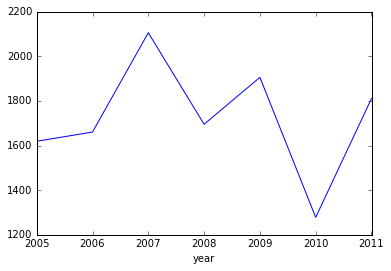

In [49]:
m['gdp'].plot()

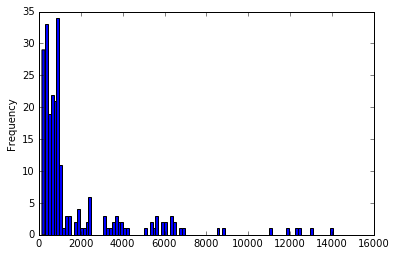

In [50]:
data.gdp.plot.hist(bins=100)

# stack /unstack 

In [51]:
data2 = data.iloc[:20][['country', 'year', 'gdp']]
data2.set_index(['country', 'year'], inplace=True)
data2

gdp
country                                year             
Sub-Saharan Africa (all income levels) 2011  1001.910589
                                       2010   988.049577
                                       2009   964.897492
                                       2008   972.295735
                                       2007   955.984531
                                       2006   925.896785
                                       2005   896.729435
Sub-Saharan Africa (developing only)   2011   990.103679
                                       2010   976.192079
                                       2009   952.202345
                                       2008   958.563481
                                       2007   943.063565
                                       2006   914.134599
                                       2005   885.551106
Algeria                                2007  3167.388923
                                       2006  3109.768558
                                       2005  3102.037384
Benin                                  2011   610.674641
                                       2010   609.916341
                                       2009   614.647369

In [52]:
data3 = data2.unstack('year')
data3

gdp                            \
year                                           2005         2006         2007   
country                                                                         
Algeria                                 3102.037384  3109.768558  3167.388923   
Benin                                           NaN          NaN          NaN   
Sub-Saharan Africa (all income levels)   896.729435   925.896785   955.984531   
Sub-Saharan Africa (developing only)     885.551106   914.134599   943.063565   

                                                                            \
year                                          2008        2009        2010   
country                                                                      
Algeria                                        NaN         NaN         NaN   
Benin                                          NaN  614.647369  609.916341   
Sub-Saharan Africa (all income levels)  972.295735  964.897492  988.049577   
Sub-Saharan Africa (developing only)    958.563481  952.202345  976.192079   

                                                     
year                                           2011  
country                                              
Algeria                                         NaN  
Benin                                    610.674641  
Sub-Saharan Africa (all income levels)  1001.910589  
Sub-Saharan Africa (developing only)     990.103679

# merge/concat/alignement

pd.concat permet de concatener des tableaux

Attention pandas aligne tout seul data en fonction des l'index.
Il remplit tout seul les missing values.


In [53]:
a = pd.DataFrame(np.arange(15).reshape(5,3), columns=['a', 'b', 'c'], index=[12., 12.8, 14.2, 21.2, 4.])
print(a)
b = pd.DataFrame(np.arange(9).reshape(3,3), columns=['b', 'c', 'd'], index=[15., 23., 18.3])
print(b)

       a   b   c
12.0   0   1   2
12.8   3   4   5
14.2   6   7   8
21.2   9  10  11
4.0   12  13  14
      b  c  d
15.0  0  1  2
23.0  3  4  5
18.3  6  7  8


In [54]:
pd.concat([a, b], axis=0)

,a,b,c,d
12.0,0.0,1,2,NaN
12.8,3.0,4,5,NaN
14.2,6.0,7,8,NaN
21.2,9.0,10,11,NaN
4.0,12.0,13,14,NaN
15.0,NaN,0,1,2.0
23.0,NaN,3,4,5.0
18.3,NaN,6,7,8.0
